# Cuccaro adder

In [2]:
from qualtran import Bloq, CompositeBloq, BloqBuilder, Signature, Register
from qualtran import QBit, QInt, QUInt, QAny
from qualtran.drawing import show_bloq, show_call_graph, show_counts_sigma
from typing import *
import numpy as np
import sympy
import cirq
from cuccaro_adder import CuccaroADD, MAJ, UMA, MyCuccaroADD

/opt/anaconda3/envs/qualtran/lib/python3.13/site-packages/cotengra/hyperoptimizers/hyper.py:54: UserWarning: Couldn't find `optuna`, `cmaes`, or `nevergrad` so will use completely random sampling in place of hyper-optimization.
  warnings.warn(
/opt/anaconda3/envs/qualtran/lib/python3.13/site-packages/cotengra/hyperoptimizers/hyper.py:36: UserWarning: Couldn't import `kahypar` - skipping from default hyper optimizer and using basic `labels` method instead.
  warnings.warn(
/opt/anaconda3/envs/qualtran/lib/python3.13/site-packages/cotengra/hyperoptimizers/hyper.py:73: UserWarning: Couldn't find `optuna`, `cmaes`, or `nevergrad` so will use completely random sampling in place of hyper-optimization.
  warnings.warn(


## `CuccaroADD`
An n-bit addition gate by an inplace ripple carry addition method.

Implements $U|a\rangle|b\rangle \rightarrow |a\rangle|a+b\rangle$ 
#### Parameters
 - `bitsize`: Size of the inputs (`a`= bitsize and `b` = bitsize+1)

#### Registers
 - `a`: A QInt.(bitsize)-sized input register.
 - `b`: A QInt.(bitsize+1)-sized input register.

#### References
 - [A new quantum ripple-carry addition circuit](https://arxiv.org/abs/quant-ph/0410184). 


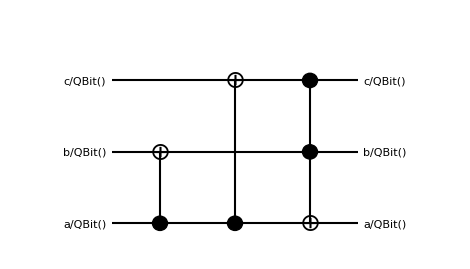

In [3]:
show_bloq(MAJ().decompose_bloq(), 'musical_score')

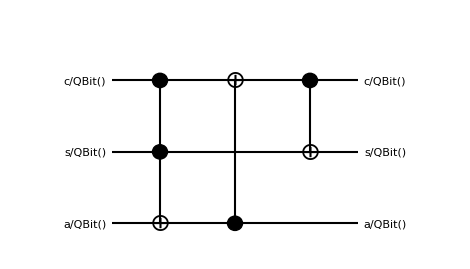

In [4]:
show_bloq(UMA().decompose_bloq(), 'musical_score')

In [5]:
cadder_5 = CuccaroADD(5)
cadder_n = CuccaroADD(sympy.Symbol('n'))

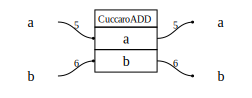

In [6]:
show_bloq(cadder_5)

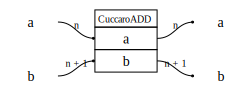

In [7]:
show_bloq(cadder_n)

### Call Graph

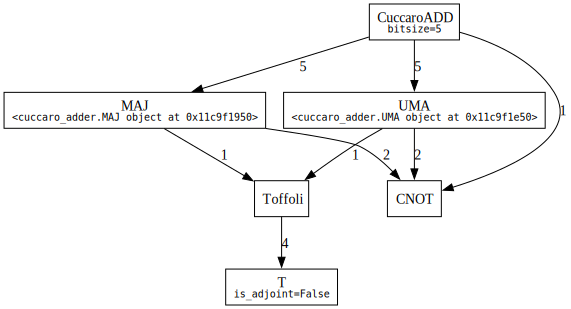

#### Counts totals:
 - `CNOT()`: 21
 - `TGate()`: 40

In [8]:
cadder_g, cadder_sigma = cadder_5.call_graph()
show_call_graph(cadder_g)
show_counts_sigma(cadder_sigma)

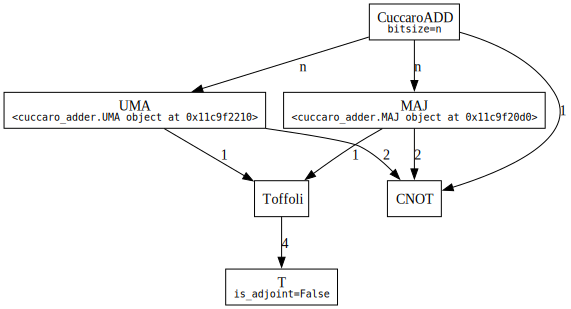

#### Counts totals:
 - `CNOT()`: $\displaystyle 4 n + 1$
 - `TGate()`: $\displaystyle 8 n$

In [9]:
cadder_g, cadder_sigma = cadder_n.call_graph()
show_call_graph(cadder_g)
show_counts_sigma(cadder_sigma)

### Bloq Decomposition

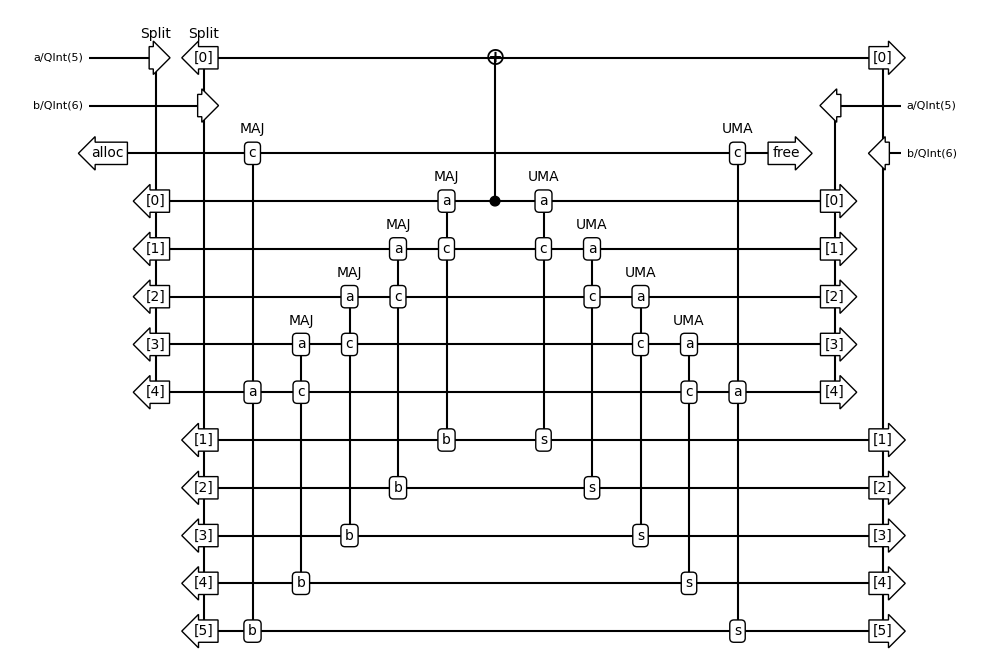

In [10]:
cbloq = cadder_5.decompose_bloq()
show_bloq(cbloq, 'musical_score')

In [11]:
bloq = CuccaroADD(6)
cbloq = bloq.decompose_bloq()
for a, b in [(1,5), (2,3), (3,4), (4,5)]:
  ref_output = a + b
  circuit_output = cbloq.call_classically(a=a, b=b)
  print(f"Input: {a}, {b}")
  print(f"Output: {circuit_output}")
  print(f"Reference: {ref_output}")
  print(circuit_output[1] == ref_output)
  print(circuit_output[0] == a)
  

Input: 1, 5
Output: (1, 6)
Reference: 6
True
True
Input: 2, 3
Output: (2, 5)
Reference: 5
True
True
Input: 3, 4
Output: (3, 7)
Reference: 7
True
True
Input: 4, 5
Output: (4, 9)
Reference: 9
True
True


In [12]:
t = bloq.tensor_contract()